In [2]:
import pandas as pd

# Example dataframes
df = pd.read_csv("shakemap.csv")


In [3]:
df['time'] = pd.to_datetime(df['time'])

# Sort the dataframe by the 'time' column
df = df.sort_values(by='time')

# Optionally, reset the index if you want a clean index after sorting
df = df.reset_index(drop=True)

In [9]:
import folium

# Define a function to assign colors based on magnitude
def get_marker_color(magnitude):
    if magnitude < 8.0:
        return 'yellow'
    elif 8.0 <= magnitude < 9.0:
        return 'red'
    else:
        return 'black'
    
def get_marker_radii(magnitude):
    if magnitude < 8.0:
        return 3
    elif 8.0 <= magnitude < 9.0:
        return 8
    else:
        return 15

# Assuming your dataframe is named df
# Create a base world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Add markers to the map
for i, row in df.iterrows():
    magnitude = row['mag']
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=get_marker_radii(magnitude),  # Size of the marker
        color =get_marker_color(magnitude),
        fill=True,
        fill_color=get_marker_color(magnitude),
        fill_opacity=0.3,
        popup=f"Magnitude: {magnitude}\nLocation: {row['place']}"
    ).add_to(world_map)

# Save the map as an HTML file
world_map.save('earthquake_map.html')

# Display map in a Jupyter Notebook (if you're using one)
world_map


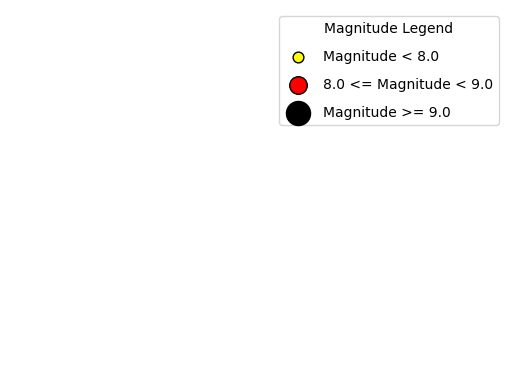

In [10]:
import matplotlib.pyplot as plt

# Define the magnitude ranges and corresponding properties
legend_info = [
    {'label': 'Magnitude < 8.0', 'color': 'yellow', 'size': 3},
    {'label': '8.0 <= Magnitude < 9.0', 'color': 'red', 'size': 8},
    {'label': 'Magnitude >= 9.0', 'color': 'black', 'size': 15}
]

# Create a plot for the legend
fig, ax = plt.subplots()

# Plot dummy markers for each magnitude range to use in the legend
for info in legend_info:
    ax.scatter([], [], c=info['color'], s=info['size']*20, label=info['label'], edgecolors='black')

# Create the legend
ax.legend(scatterpoints=1, frameon=True, labelspacing=1, title="Magnitude Legend")

# Hide the axes (optional)
ax.set_axis_off()

# Show the plot (which will only display the legend)
plt.show()


In [49]:
import numpy as np

C:\Users\deepp\AppData\Local\Temp\ipykernel_22840\4043220405.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valid_country_counts.index, y=valid_country_counts.values, palette=palette)


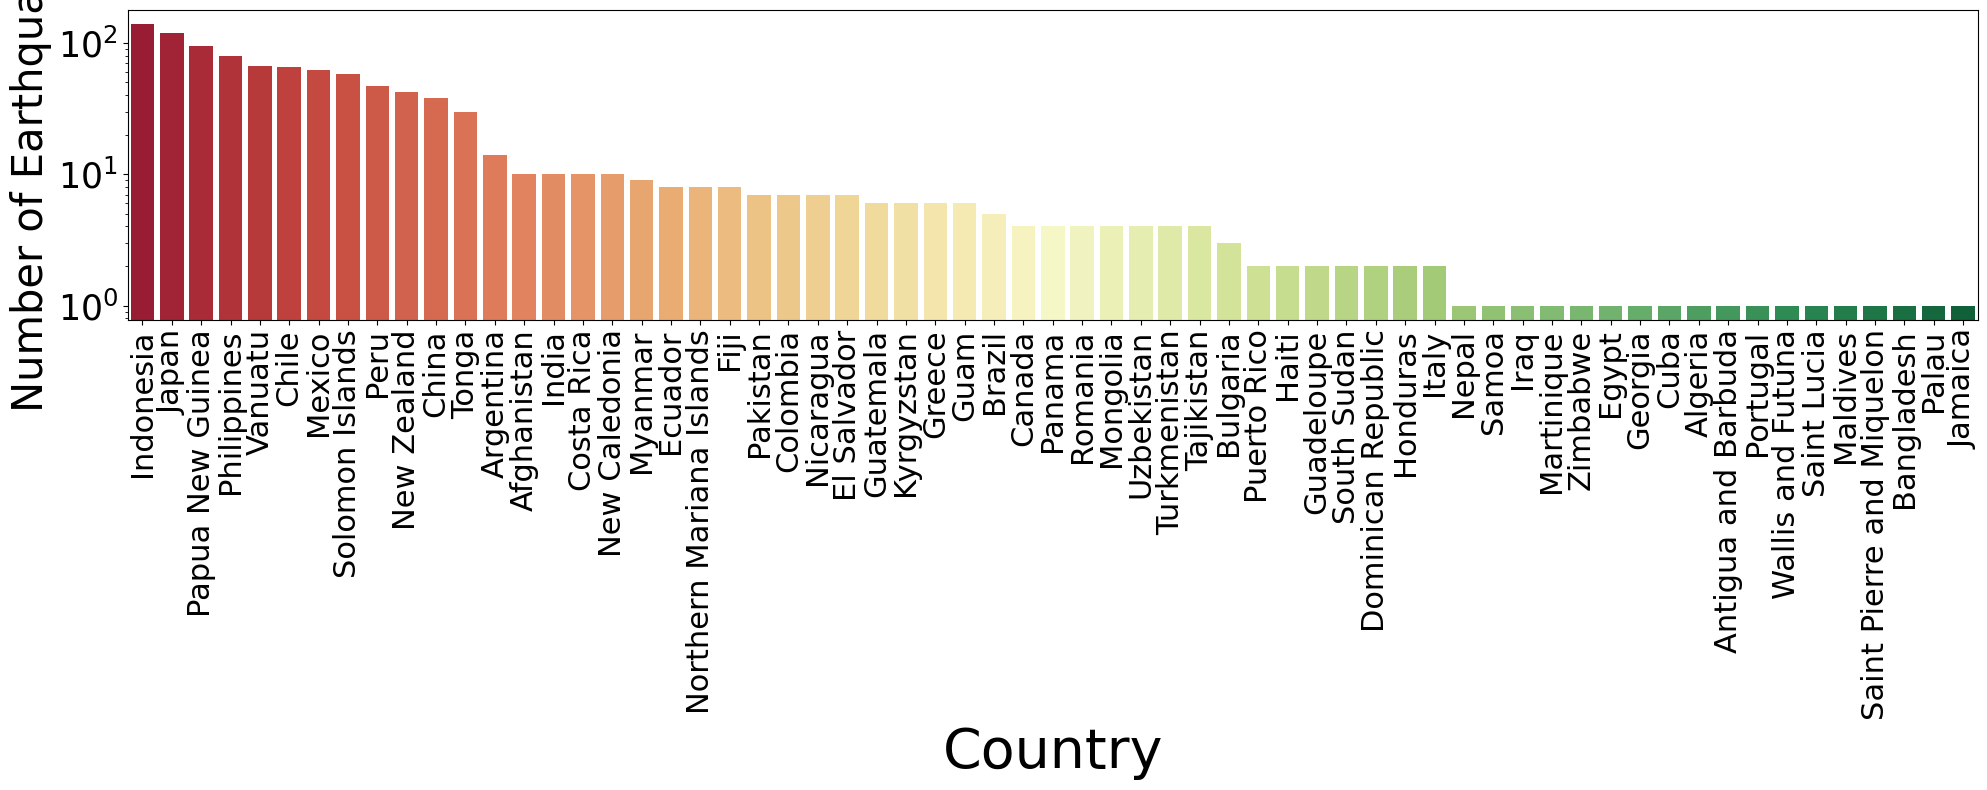

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry

# Step 1: Extract country (assuming country is at the end of 'place' string)
df['country'] = df['place'].apply(lambda x: x.split(',')[-1].strip() if ',' in x else 'Unknown')

# Step 2: Get list of valid country names from pycountry
valid_countries = [country.name for country in pycountry.countries]

# Step 3: Function to check if a country is valid
def is_valid_country(country):
    return country in valid_countries

# Step 4: Filter out 'Unknown' and invalid countries
df_valid = df[df['country'].apply(is_valid_country)]

# Step 5: Calculate the count for each valid country
valid_country_counts = df_valid['country'].value_counts()

# List of palettes to try
palettes = ["RdYlGn"]

# Loop through each palette and generate a plot
for palette in palettes:
    plt.figure(figsize=(20, 8))
    sns.barplot(x=valid_country_counts.index, y=valid_country_counts.values, palette=palette)

    # Set plot labels and font sizes
    plt.xticks(rotation=90, fontsize=22)
    plt.yticks(rotation=0, fontsize=25)
    plt.xlabel('Country', fontsize=40)
    plt.ylabel('Number of Earthquakes', fontsize=30)

    # Apply logarithmic scale to the y-axis
    plt.yscale('log')

    # Set title for each palette
    # plt.title(f'Palette: {palette}', fontsize=16)
    plt.savefig(f'earthquake_frequency_{palette}.png', bbox_inches='tight')
    
    # Show the plot
    plt.tight_layout()
    plt.show()



In [30]:
df['country'].nunique()

87